# Extracts & cleans data from Spotify using spotipy API

In [1]:
import os
import spotipy 
from spotipy.oauth2 import SpotifyClientCredentials

# spotify auth
CLIENT_ID = os.environ.get('SPOTIFY_CLIENT_ID')
CLIENT_SECRET = os.environ.get('SPOTIFY_CLIENT_SECRET')

auth_manager = SpotifyClientCredentials(client_id = CLIENT_ID, client_secret = CLIENT_SECRET)
sp = spotipy.Spotify(auth_manager=auth_manager)

In [6]:
import pandas as pd

# gets a feature/obj from a 2d list
# lst: list, obj: str/int
get_obj = lambda lst, obj : [lst[i][obj] for i in range(len(lst))] 

# refines a list of playlist items
def get_playlist(_id: int) -> pd.DataFrame:
    _playlist = sp.playlist_tracks(ce_id) # fetch playlist
    track_count = _playlist['total']
    
    # 100 item limit per request
    while track_count != len(_playlist['items']):
        batch = sp.playlist_tracks(_id, offset = len(_playlist['items']))
        _playlist['items'].extend(batch['items'])
    
    items = _playlist['items']
    tracks = get_obj(items,'track')
    artists = get_obj(tracks,'artists')
    
    artist_names = []
    for ix in range(track_count):
        z = []
        for jx in range(len(artists[ix])):
            z.append(artists[ix][jx]['name'])
        artist_names.append(z)
    
    return pd.DataFrame({
        'name': get_obj(tracks,'name'),
        'artist_name': artist_names,
        'id': get_obj(tracks,'id')
    })

# returns audio features given a list of track ids
def get_audio_features(_ids: list) -> pd.DataFrame:
    audio_features = []
    total = len(_ids)
    
    # 100 item limit per request
    for i in range(total//100):
        audio_features.extend(sp.audio_features(_ids[i*100:i*100+100]))
    audio_features.extend(sp.audio_features(_ids[len(audio_features):total]))
    
    # convert to pandas dataframe
    return pd.DataFrame({
        'danceability': get_obj(audio_features,'danceability'),
        'energy': get_obj(audio_features,'energy'),
        'key': get_obj(audio_features,'key'),
        'loudness': get_obj(audio_features,'loudness'),
        'mode': get_obj(audio_features,'mode'),
        'speechiness': get_obj(audio_features,'speechiness'),
        'acousticness': get_obj(audio_features,'acousticness'),
        'instrumentalness': get_obj(audio_features,'instrumentalness'),
        'liveness': get_obj(audio_features,'liveness'),
        'valence': get_obj(audio_features,'valence'),
        'tempo': get_obj(audio_features,'tempo')
    })


In [7]:
# fetch classical essentials playlist & all its track audio features

ce_id = '37i9dQZF1DWWEJlAGA9gs0' # classical essentials playlist id
ce_df = get_playlist(ce_id)
ce_af = get_audio_features(ce_df.id)
ce_df = ce_df.join(ce_af)

In [8]:
ce_df

,name,artist_name,id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,"The Well-Tempered Clavier: Book 1, BWV 846-869...","[Johann Sebastian Bach, Lang Lang]",4SFBV7SRNG2e2kyL1F6kjU,0.2210,0.1260,0,-25.427,1,0.0447,0.989,0.89700,0.1020,0.2160,133.630
1,The Lark Ascending,"[Ralph Vaughan Williams, Tasmin Little, BBC Ph...",2kAgCRZPG3YQR2VMqRvLmb,0.0811,0.0122,4,-32.654,0,0.0511,0.902,0.30800,0.0648,0.0384,74.554
2,Handel / Orch. Hale: Keyboard Suite in D Minor...,"[George Frideric Handel, Alexander Briger, Aca...",1upQiytDIEZfl9ItruoXuC,0.2040,0.0331,2,-24.044,0,0.0487,0.927,0.82500,0.0954,0.0547,116.200
3,"Bagatelle No. 25 in A Minor, ""Für Elise"", WoO 59","[Ludwig van Beethoven, Lang Lang]",0H2VhGUC3P3hvwz8rdGIpC,0.2300,0.0487,5,-27.675,1,0.0412,0.986,0.94500,0.0679,0.1010,134.839
4,"Rhapsody On A Theme Of Paganini, Op.43: Variat...","[Sergei Rachmaninoff, Daniil Trifonov, Philade...",419qlOGNXoyICx4jO0hqaj,0.2050,0.0525,1,-23.841,1,0.0327,0.980,0.90600,0.1030,0.0511,88.316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,The Firebird (L'oiseau De Feu) - Suite (1919):...,"[Igor Stravinsky, Orchestre de l'Opéra Bastill...",0mTUTkFQ2MxmUHFL8EdfeR,0.1230,0.2250,4,-16.798,1,0.0351,0.730,0.50900,0.0658,0.0550,78.132
168,"Holberg Suite, Op. 40: 1. Präludium (Allegro v...","[Edvard Grieg, Gothenburg Symphony Orchestra, ...",07xafomqQcYmFJbr4jpfHa,0.2370,0.0606,7,-22.569,1,0.0374,0.910,0.93900,0.1310,0.2560,136.284
169,"Die Forelle, Op. 32, D. 550","[Franz Schubert, Dietrich Fischer-Dieskau, Ger...",7lCqzDWT6GPECGp0TzMnR7,0.5140,0.0772,11,-21.076,1,0.0352,0.981,0.00306,0.0859,0.5110,87.514
170,"Cello Concerto No. 1 in C Major, Hob.VIIb:1: I...","[Franz Joseph Haydn, Steven Isserlis, Sir Roge...",0Gh45IbIKOG9IucFfrZqLT,0.3750,0.1210,0,-23.440,1,0.0406,0.984,0.87100,0.0984,0.4530,147.398


In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

# display a grid of colors using mpl subplots
def plot_colors(colors: '[[r,g,b]]', grid: '(rows,cols)'):
    # assumed rows*cols == len(colors)
    rows, cols = grid
    fig, axs = plt.subplots(rows, cols)
    i = 0
    
    if rows == 1 or cols == 1: 
        imgs = cols if rows == 1 else rows
        for img in range(imgs):
            axs[img].imshow([[colors[i]]])
            axs[img].axis('off')
            i += 1
    else:
        for row in range(rows):
            for col in range(cols):
                axs[row,col].imshow([[colors[i]]])
                axs[row,col].axis('off')
                i += 1
            
    plt.show()

In [7]:
import numpy as np

# converts hsl to rgb
def hsl_to_rgb(h: 'hue', s: 'saturation', l: 'lightness') -> '[r,g,b]': 
    # h∈[0,365], s∈[0,1], l∈[0,1]
    # returns rgb conversion where r, g, b ∈ [0,255]
    r, g, b = 0, 0, 0
    
    c = (1-abs(2*l-1))*s #chroma
    hp = h/60
    x = c * (1-abs(hp%2-1))
    m = l - 0.5*c
    
    if 0 <= hp <= 1:
        r, g, b = c, x, 0
    elif 1 < hp <= 2:
        r, g, b = x, c, 0
    elif 2 < hp <= 3:
        r, g, b = 0, c, x
    elif 3 < hp <= 4:
        r, g, b = 0, x, c
    elif 4 < hp <= 5:
        r, g, b = x, 0, c
    elif 5 < hp < 6:
        r, g, b = c, 0, x
    
    rgb = (np.array([r,g,b])+m)*255
    return np.ceil(rgb).astype(int)

In [8]:
colors = []

cols = 13
rows = 10
hue = np.linspace(0,360, num = cols)
light = np.linspace(0.1,0.9, num = rows)

for l in light:
    for h in hue:
        colors.append(hsl_to_rgb(h,1,l))

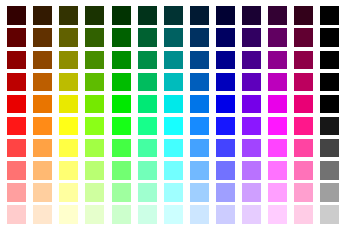

In [9]:
plot_colors(colors,(rows,cols))